# Credit Default Prediction using Machine Learning: A Binary Classification Analysis

The dataset I will be using is default of credit card clients Data Set.
There are two data files: "CreditDefault_training.csv" and "CreditDefault_Xtest.csv"
Both files have the following fields, except the label ("default.payment.next.month") which is not available in "CreditDefault_Xtest.csv"

Features:

1 - LIMIT_BAL:  Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit. <br>
2 - SEX: (1 = male; 2 = female) <br>
3- EDUCATION: (six levels: 1,2,3,4,5,6) <br>
4 - MARRIAGE: (1 = married; 2 = single; 3 = others) <br>
5 - AGE <br>

From "PAY_1" to "PAY_6": History of past payment (Repayment status: -2: Balance paid in full and no transactions this period; -1: Balance paid in full, but account has a positive balance at end of period due to recent transactions for which payment has not yet come due; 0: Customer paid the minimum due amount, but not the entire balance; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.)<br>
6 - PAY_1: the repayment status in September, 2005 <br>
7 - PAY_2: the repayment status in August, 2005 <br>
...<br>
11 - PAY_6: the repayment status in April, 2005 <br>

From "BILL_AMT1" to "BILL_AMT6": Amount of bill statement (NT dollar).<br>
12 - BILL_AMT1 : amount of bill statement in September, 2005<br>
13 - BILL_AMT2 : amount of bill statement in August, 2005<br>
...<br>
17 - BILL_AMT6 : amount of bill statement in April, 2005<br>

From "PAY_AMT1" to "PAY_AMT6": Amount of previous payment (NT dollar).<br>
18 - PAY_AMT1 : amount paid in September, 2005<br>
19 - PAY_AMT2 : amount paid in August, 2005<br>
...<br>
23 - PAY_AMT6 : amount paid in April, 2005<br>

Target:

default.payment.next.month: binary variable, whether default payment (Yes = 1, No = 0)

Training dataset, "CreditDefault_training.csv", contains 3985 rows and 24 columns. This is the training set containing both of the features and the target.
Test dataset, "CreditDefault_Xtest.csv", contains 1000 rows and 23 columns. This is the test set which only contains the features.

Prediction task is to determine whether there's credit default for a person.

In [ ]:
import numpy as np
import pandas as pd
from google.colab import files
import io

In [ ]:
# Load the training data set
uploaded = files.upload()

credit_train = pd.read_csv('CreditDefault_training.csv')
credit_train.head()

Saving CreditDefault_training.csv to CreditDefault_training.csv
Saving CreditDefault_Xtest.csv to CreditDefault_Xtest.csv


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,50000,2,2,2,24,-1,-1,-1,-1,0,...,6561,5091,353,1572,1572,6561,102,353,27000,0
1,70000,2,2,2,24,0,0,0,0,0,...,64733,66680,71243,3000,3000,2500,3000,5800,0,0
2,420000,1,1,1,43,-2,-2,-2,-2,-2,...,2846,3027,5946,14274,8232,2853,3027,5946,32053,0
3,30000,1,2,3,53,1,-2,-1,2,0,...,3825,3825,0,0,4070,0,0,0,0,1
4,50000,2,2,1,49,1,2,2,2,0,...,21951,22287,22778,1000,3321,0,1000,1000,1001,0


In [ ]:
# Split training data into X and y
credit_X_train = credit_train.loc[:,credit_train.columns != 'default.payment.next.month']
y = credit_train['default.payment.next.month']

## Standardization and One-hot Encoding

Standardize the continuous features and convert categorical variables ('SEX', 'EDUCATION', 'MARRIAGE', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6') into dummy variables.<br>
Note the situation where not all repayment status categories (-2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9) necessarily appear in the training dataset for variables 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6'.

Standardization and one-hot encoding for training set and test set

In [ ]:
# Load test data set
credit_test = pd.read_csv('CreditDefault_Xtest.csv')
credit_test.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,80000,1,6,1,41,0,0,0,0,0,...,133017,19164,3272,11766,4351,3520,1000,3272,11766,1740
1,50000,1,1,2,35,0,0,0,0,0,...,18188,18397,18161,18383,1565,7240,795,1000,673,647
2,80000,2,1,1,42,2,2,2,2,2,...,20471,20638,21003,20529,1600,1700,800,1000,0,2000
3,160000,2,2,2,27,0,0,0,0,0,...,80240,39835,41150,0,3600,3700,1700,2000,0,0
4,30000,1,1,1,30,0,0,0,0,0,...,14634,16378,16961,19669,3000,2000,2000,1000,3000,1000


In [ ]:
#standardization for training set
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
sc = StandardScaler()
cat_col = ['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
target_x = credit_X_train.drop(cat_col, axis = 1)
X_numeric = pd.DataFrame(sc.fit_transform(target_x),columns = target_x.columns)

# Creating labels of the exhaustive list of values for each column
sex_labels = [1,2]
education_labels = [1,2,3,4,5,6]
marriage_labels = [1,2,3]
pay1_labels = [-2,-1,0,1,2,3,4,5,6,7,8,9]
pay2_labels = [-2,-1,0,1,2,3,4,5,6,7,8,9]
pay3_labels = [-2,-1,0,1,2,3,4,5,6,7,8,9]
pay4_labels = [-2,-1,0,1,2,3,4,5,6,7,8,9]
pay5_labels = [-2,-1,0,1,2,3,4,5,6,7,8,9]
pay6_labels = [-2,-1,0,1,2,3,4,5,6,7,8,9]

#one hot encoding for training set
ohe = OneHotEncoder(categories=[sex_labels, education_labels, marriage_labels, pay1_labels, pay2_labels, pay3_labels, pay4_labels, pay5_labels, pay6_labels])
cat_train = credit_X_train[cat_col]
encoded_train_X = ohe.fit_transform(cat_train).toarray()
X_cat = pd.DataFrame(encoded_train_X, columns = ohe.get_feature_names_out(cat_train.columns))
X = pd.concat([X_numeric, X_cat], axis = 1)
X.head()

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,...,PAY_6_0,PAY_6_1,PAY_6_2,PAY_6_3,PAY_6_4,PAY_6_5,PAY_6_6,PAY_6_7,PAY_6_8,PAY_6_9
0,-0.902690,-1.237370,-0.659401,-0.657623,-0.653395,-0.558590,-0.564919,-0.630095,-0.264370,-0.244519,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.751263,-1.237370,0.123571,0.174192,0.222944,0.299113,0.397532,0.500862,-0.175510,-0.171175,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.898720,0.816144,-0.573530,-0.484216,-0.572498,-0.613365,-0.597173,-0.540866,0.526037,0.097548,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-1.054118,1.896941,-0.680080,-0.679090,-0.618263,-0.598931,-0.584702,-0.635727,-0.362190,-0.116218,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.902690,1.464622,-0.427412,-0.411319,-0.357541,-0.331676,-0.296197,-0.272334,-0.299963,-0.154688,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#standardization and one-hot encoding for testing set
target_x2 = credit_test.drop(cat_col, axis = 1)
X_test_numeric = pd.DataFrame(sc.transform(target_x2), columns = target_x2.columns)

cat_test = credit_test[cat_col]
encoded_test = ohe.transform(cat_test).toarray()
X_test_cat = pd.DataFrame(encoded_test, columns = ohe.get_feature_names_out(cat_test.columns))
X_test = pd.concat([X_test_numeric, X_test_cat], axis = 1)
X_test.head()

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,...,PAY_6_0,PAY_6_1,PAY_6_2,PAY_6_3,PAY_6_4,PAY_6_5,PAY_6_6,PAY_6_7,PAY_6_8,PAY_6_9
0,-0.675549,0.599985,1.497990,1.410763,1.195271,-0.372768,-0.593344,-0.448016,-0.091441,-0.144467,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.902690,-0.048493,-0.045199,-0.417683,-0.419705,-0.384077,-0.360674,-0.342450,-0.264805,0.046597,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.675549,0.708064,-0.438330,-0.414473,-0.387596,-0.351035,-0.316262,-0.308213,-0.262627,-0.237945,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.069838,-0.913131,0.643418,0.394180,0.453006,-0.067989,-0.001425,-0.635727,-0.138173,-0.135222,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-1.054118,-0.588892,-0.548221,-0.503539,-0.469689,-0.413846,-0.379426,-0.321934,-0.175510,-0.222536,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**Splitting training data into training and validation set (70:30 ratio) (the code has been provided)**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

Print the shape of X_train, y_train, X_val

In [ ]:
X_train.shape, X_val.shape, y_train.shape

((2789, 97), (1196, 97), (2789,))

## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [ ]:
# If there is any ConvergenceWarning, increase the number of iterations. (Let max_iter = 200)
lr = LogisticRegression(max_iter = 200)
lr.fit(X_train, y_train)

LogisticRegression(max_iter=200)

In [ ]:
# predict the output for validation dataset
y_preds = lr.predict(X_val)

Implement my_precision(), my_recall(), my_accuracy() by yourselves

In [ ]:
def my_precision(y, y_preds): #TP/(TP+FP)
    tp = 0
    fp = 0
    for i in range(len(y)):
        if y[i] == 1 and y_preds[i] == 1:
            tp += 1
        elif y[i] == 0 and y_preds[i] == 1:
            fp += 1
    return tp / (tp + fp)

def my_recall(y, y_preds): #TP/(TP+FN)
    tp = 0
    fn = 0
    for i in range(len(y)):
        if y[i] == 1 and y_preds[i] == 1:
            tp += 1
        elif y[i] == 1 and y_preds[i] == 0:
            fn += 1
    return tp / (tp + fn)


def my_accuracy(y, y_preds): #(TP+TN)/(TP+FP+FN+TN)
    tp = 0
    tn = 0
    fp = 0
    fn = 0
    for i in range(len(y)):
        if y[i] == 1 and y_preds[i] == 1:
            tp += 1
        elif y[i] == 0 and y_preds[i] == 0:
            tn += 1
        elif y[i] == 0 and y_preds[i] == 1:
            fp += 1
        else:
            fn += 1
    return (tp + tn) / (tp + fp + fn + tn)

Use your above functions to compute precision, recall, and accuracy of your model on validation set:

In [ ]:
my_precision(y_val.values, y_preds)

0.6610169491525424

In [ ]:
my_recall(y_val.values, y_preds)

0.43333333333333335

In [ ]:
my_accuracy(y_val.values, y_preds)

0.8219063545150501

In this case, the dataset is imbalanced. Recall is more suitable because the bank cares about the cases of default the most, and the model's performance is best evaluated with the cases of predicted default in terms of the percentage of predicted default over all actual defaults. The bank cares the most about false negative cases where the default behavior takes place without being predicted.

### ROC curve

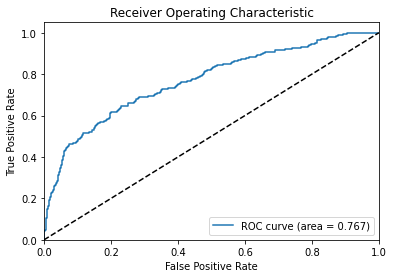

In [ ]:
# Plot the ROC curve 
from sklearn.metrics import roc_curve
import sklearn.metrics as metrics
probs = lr.predict_proba(X_val)
preds = probs[:,1]
fpr, tpr, thresholds = roc_curve(y_val, preds)
roc_auc = metrics.auc(fpr, tpr)

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

## Hyperparameters

"Model tuning" refers to model adjustments to better fit the data, which is separate from "fitting" or "training" the model.


Below builds a model with hyperparameter 'C' set to 0.1 and penalty set to 'l1'.

In [ ]:
lr2 = LogisticRegression(C = 0.1, penalty = 'l1', solver='liblinear')
lr2.fit(X_train, y_train)
y_preds2 = lr2.predict(X_val)
print(f'Precision is {round(my_precision(y_val.values, y_preds2)*100,2)}%')
print(f'Recall is {round(my_recall(y_val.values, y_preds2)*100,2)}%')
print(f'Accuracy is {round(my_accuracy(y_val.values, y_preds2)*100,2)}%')

Precision is 68.05%
Recall is 42.59%
Accuracy is 82.53%


Below builds a model with hyperparameter 'C' set to 0.5 and penalty set to 'l1'. 

In [ ]:
lr3 = LogisticRegression(C = 0.5, penalty = 'l1', solver='liblinear')
lr3.fit(X_train, y_train)
y_preds3 = lr3.predict(X_val)
print(f'Precision is {round(my_precision(y_val.values, y_preds3)*100,2)}%')
print(f'Recall is {round(my_recall(y_val.values, y_preds3)*100,2)}%')
print(f'Accuracy is {round(my_accuracy(y_val.values, y_preds3)*100,2)}%')

Precision is 66.86%
Recall is 43.33%
Accuracy is 82.36%


Below builds a model with hyperparameter 'C' set to 0.1 and penalty set to 'l2'.

In [ ]:
lr4 = LogisticRegression(C = 0.1, penalty = 'l2', max_iter = 200)
lr4.fit(X_train, y_train)
y_preds4 = lr4.predict(X_val)
print(f'Precision is {round(my_precision(y_val.values, y_preds4)*100,2)}%')
print(f'Recall is {round(my_recall(y_val.values, y_preds4)*100,2)}%')
print(f'Accuracy is {round(my_accuracy(y_val.values, y_preds4)*100,2)}%')

Precision is 66.28%
Recall is 42.22%
Accuracy is 82.11%


Below builds a model with hyperparameter 'C' set to 0.5 and penalty set to 'l2'. 

In [ ]:
lr5 = LogisticRegression(C = 0.5, penalty = 'l2', max_iter = 1000, solver='saga')
lr5.fit(X_train, y_train)
y_preds5 = lr5.predict(X_val)
print(f'Precision is {round(my_precision(y_val.values, y_preds5)*100,2)}%')
print(f'Recall is {round(my_recall(y_val.values, y_preds5)*100,2)}%')
print(f'Accuracy is {round(my_accuracy(y_val.values, y_preds5)*100,2)}%')

Precision is 66.48%
Recall is 43.33%
Accuracy is 82.27%


Model lr3 (with hyperparameter 'C' = 0.5 and penalty 'l1') and Model lr5 (with hyperparameter 'C' = 0.5 and penalty 'l2') have the highest recall of 43.33%. Since Model lr3 has greater precision and accuracy as well, we choose lr3 for our model.

# Test set

I have worked on training and validation dataset so far, but test data does not include the labels. 

In [ ]:
y_pred = lr3.predict(X_test)
print(y_pred)

# convert y_pred array into a dataframe and print output
y_pred_df = pd.DataFrame(y_pred, columns = ['Default prediction'])
print(y_pred_df.head())

[0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 1 0 1 0 0 1 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 1 0 1 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 1 1 0 0 0 0 1 0 0 0 1 0 0 0 1 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 1 1 0 0 0 1 0
 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 1 1 0 0 0 0 